In [ ]:
df.dtypes

index                 int64
company              object
body-style           object
wheel-base          float64
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             61 non-null     int64  
 1   company           61 non-null     object 
 2   body-style        61 non-null     object 
 3   wheel-base        61 non-null     float64
 4   length            61 non-null     float64
 5   engine-type       61 non-null     object 
 6   num-of-cylinders  61 non-null     object 
 7   horsepower        61 non-null     int64  
 8   average-mileage   61 non-null     int64  
 9   price             58 non-null     float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


In [ ]:
df.shape

(61, 10)

A. Is there any missing values in the data? If yes, drop the rows with missing values.

In [ ]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [ ]:
#the above snippet shows that there are 3 missing values in the price column

df[df['price'].isnull()]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


In [ ]:
df['price'] = df['price'].fillna(df['price'].mean())

In [ ]:
df.isnull().sum()

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               0
dtype: int64

Now there are no missing values in the data set

**B. And answer the following question. **




In [ ]:
# which are the cars with minimum or maximum price?

min_price = df['price'].min()

max_price = df['price'].max()

print("The cars with minimum price is ",min_price)
print("The cars with maximum price is ",max_price)

The cars with minimum price is  5151.0
The cars with maximum price is  45400.0


In [ ]:
#How many cars are there with different body-styles?

df['body-style'].value_counts()

body-style
sedan          32
hatchback      15
wagon           9
convertible     3
hardtop         2
Name: count, dtype: int64

In [ ]:
#What is the average price of all body types of cars? Arrange them in descending order

df.groupby('body-style')['price'].mean().sort_values(ascending=False)

body-style
hardtop        39714.000000
convertible    22341.000000
sedan          17561.375000
wagon          12730.111111
hatchback       7708.066667
Name: price, dtype: float64

In [ ]:
# What is the average price of cars by different companies? Arrange them in descending order
df.groupby('company')['price'].mean().sort_values(ascending=False)

company
mercedes-benz    35040.000000
jaguar           34600.000000
porsche          28814.333333
bmw              27213.333333
audi             16392.500000
alfa-romero      15498.333333
volvo            13177.500000
isuzu            12519.666667
honda            10195.000000
mazda             9654.800000
volkswagen        8435.000000
nissan            8289.000000
toyota            8216.857143
mitsubishi        6689.000000
dodge             6303.000000
chevrolet         6007.000000
Name: price, dtype: float64

In [ ]:
# Count car types have diffeent number cylinders?

df['num-of-cylinders'].value_counts()

num-of-cylinders
four      39
six       11
five       5
eight      3
three      1
twelve     1
two        1
Name: count, dtype: int64

Exploratory data analysis - Visualization / matplotlib



**1.Company & price**

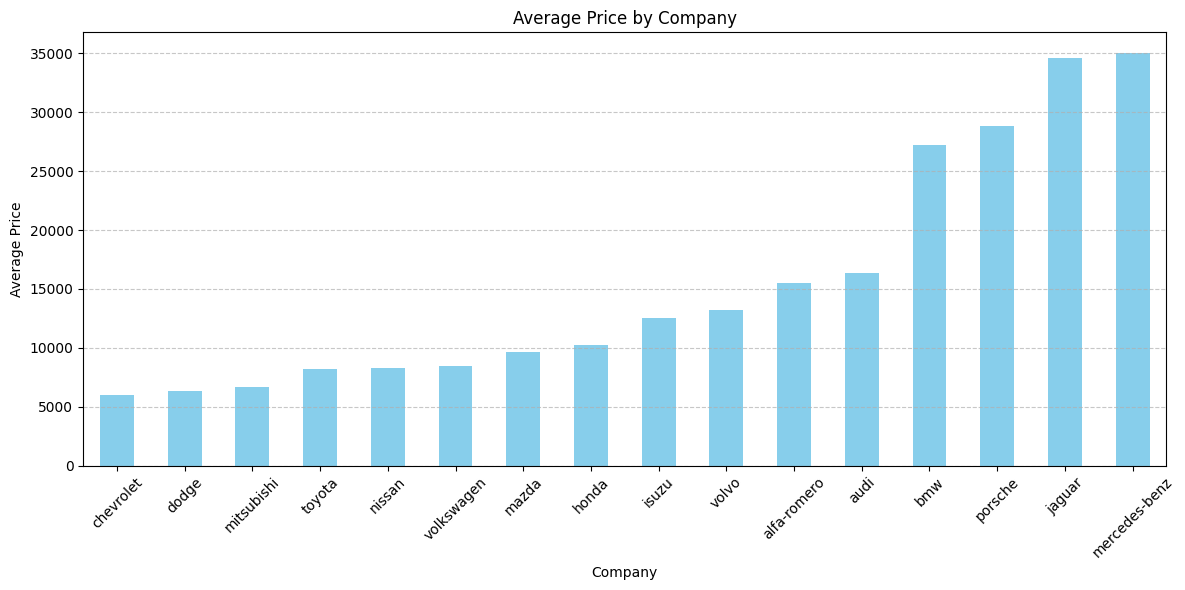

In [ ]:
import matplotlib.pyplot as plt

avg_price_by_company = df.groupby('company')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 6))
avg_price_by_company.plot(kind='bar', color='skyblue')
plt.title('Average Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**2.Company & no of cylinders**

<Figure size 1200x600 with 0 Axes>

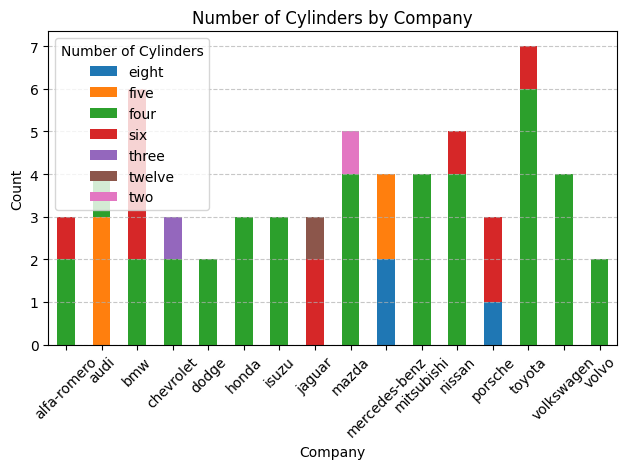

In [ ]:
# Count of cylinders by company
cylinders_count_by_company = df.groupby('company')['num-of-cylinders'].value_counts().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))
cylinders_count_by_company.plot(kind='bar', stacked=True)
plt.title('Number of Cylinders by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Number of Cylinders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.Body type & price**

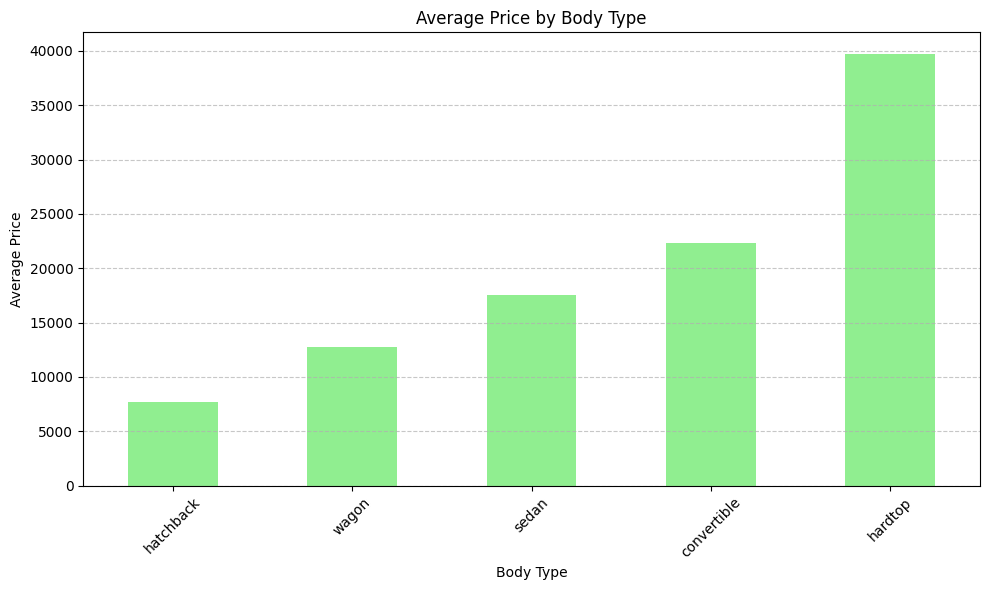

In [ ]:
# Average price by body type
avg_price_by_body_type = df.groupby('body-style')['price'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_price_by_body_type.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**4.Body type & cylinders**

<Figure size 1000x600 with 0 Axes>

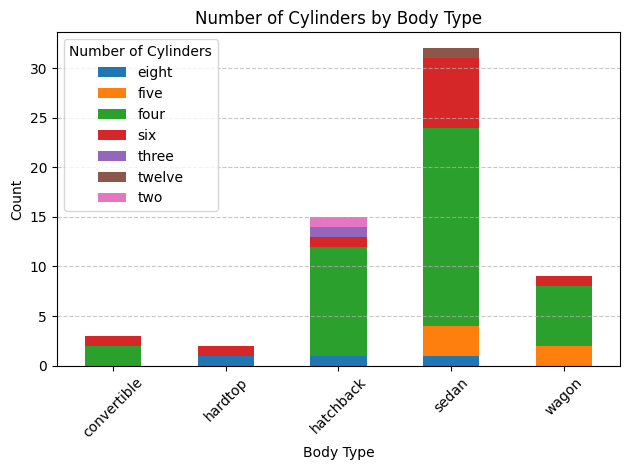

In [ ]:
# Count of cylinders by body type
cylinders_count_by_body_type = df.groupby('body-style')['num-of-cylinders'].value_counts().unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
cylinders_count_by_body_type.plot(kind='bar', stacked=True)
plt.title('Number of Cylinders by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Number of Cylinders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**5.engine type & horse power**

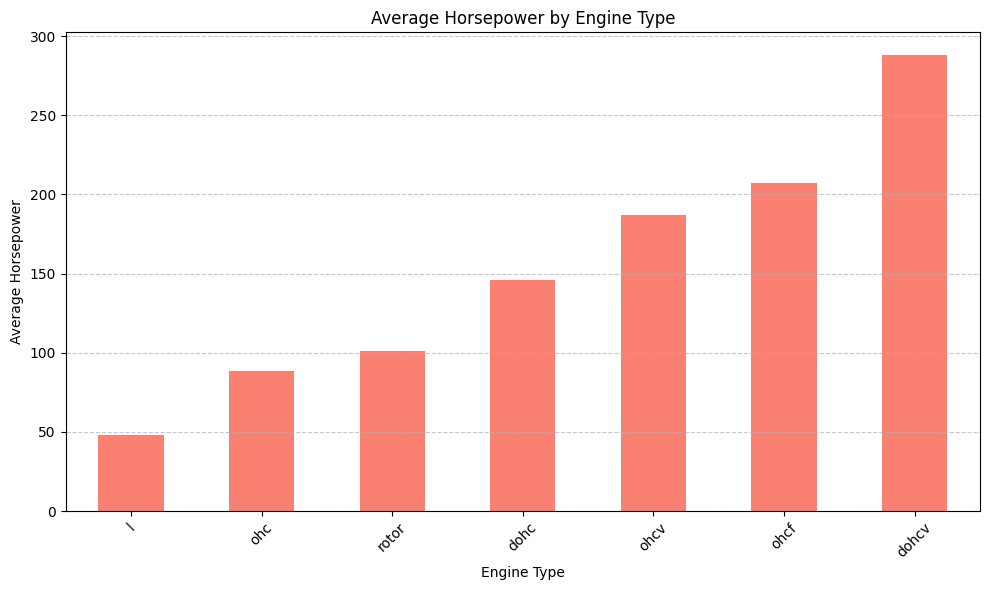

In [ ]:
# Average horsepower by engine type
avg_hp_by_engine_type = df.groupby('engine-type')['horsepower'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 6))
avg_hp_by_engine_type.plot(kind='bar', color='salmon')
plt.title('Average Horsepower by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Average Horsepower')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
